In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from tqdm import tqdm
import os
import pickle
import csv

In [17]:
def check_monolingual(experiment_info):
    if(experiment_info['context_lang'] == experiment_info['question_lang']):
        if(experiment_info['question_lang'] == experiment_info['noise_type']):
            return experiment_info['context_lang']
    return False

In [18]:
languages = ['en', 'hi', 'de', 'zh', 'vi', 'es', 'ar']
context_lengths = ['4K', '16K', '32K']
needle_positions = ['start', 'middle', 'end']

# context_length

## accuracy_binary

In [19]:
metric = 'accuracy_binary'
path_to_data = '/home/prasoon/Desktop/analysis/data'
response_model = 'llama-2-7b-chat'

In [20]:
import os
import glob
import json
import ast

path = path_to_data + '/' + response_model
os.chdir(path)
extension = 'csv'
files = glob.glob('*.{}'.format(extension))

context_length_info = {}
languages = ['en', 'hi', 'de', 'zh', 'vi', 'es', 'ar']
context_lengths = ['4K', '16K', '32K']
needle_positions = ['start', 'middle', 'end']

for language in languages:
    context_length_info[language] = {}
    for context_length in context_lengths:
        context_length_info[language][context_length] = {}
        for needle_position in needle_positions:
            context_length_info[language][context_length][needle_position] = []
count = 0
for file in files:
    print(file)
    context_length = file.split('_')[-1].split('.')[0]
    df = pd.read_csv(path_to_data + '/' + response_model + '/' + file, engine = 'python')
    for index, row in tqdm(df.iterrows()):
        experiment_info = ast.literal_eval(df.loc[index]['experiment'])
        if(check_monolingual(experiment_info)):
            lang = check_monolingual(experiment_info)
            needle_position = experiment_info['needle_position']
            context_length_info[lang][context_length][needle_position].append(row[metric])
    del df

    

llama-2-7b-chat_4K.csv


117600it [00:18, 6317.43it/s]


llama-2-7b-chat_32K.csv


117600it [00:14, 8367.29it/s]


llama-2-7b-chat_16K.csv


117600it [00:13, 8650.05it/s]


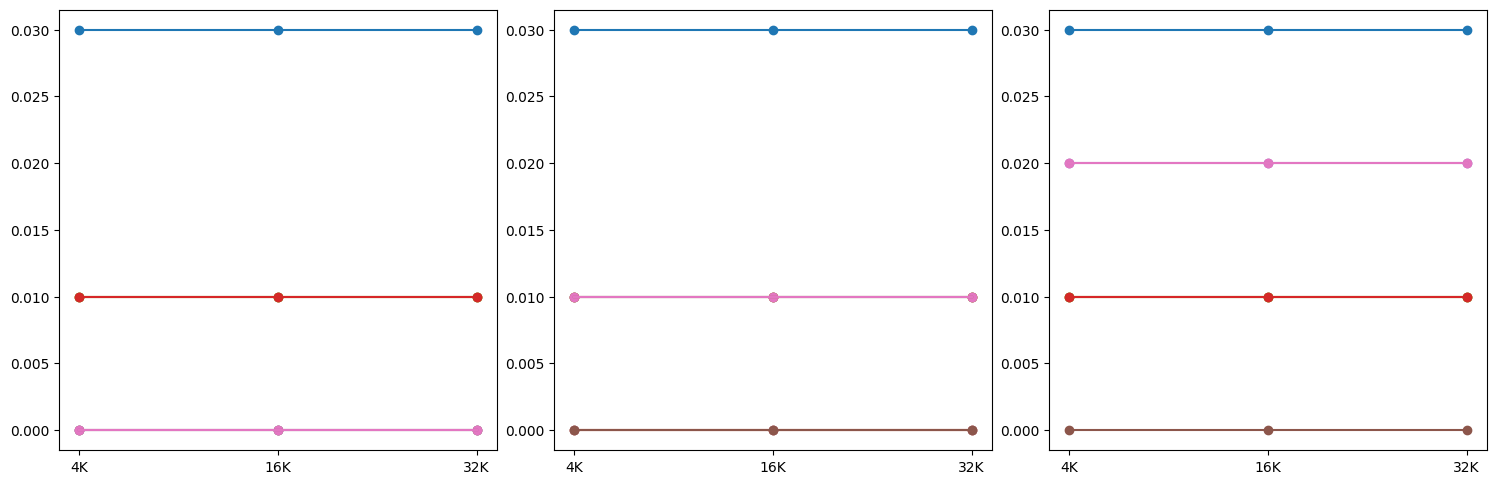

In [22]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

fig.tight_layout()
for needle_position_index in range(len(needle_positions)):
    needle_position = needle_positions[needle_position_index]
    for lang in languages:
        plot_data = []
        for context_length in context_lengths:
            plot_data.append(np.mean(context_length_info[lang][context_length][needle_position]))
        ax[needle_position_index].scatter(context_lengths, plot_data, label = lang)
        ax[needle_position_index].plot(context_lengths, plot_data, label = lang)

## accuracy_prob

In [26]:
metric = 'accuracy_prob'
path_to_data = '/home/prasoon/Desktop/analysis/data'
response_model = 'llama-2-7b-chat'

In [27]:
import os
import glob
import json
import ast

path = path_to_data + '/' + response_model
os.chdir(path)
extension = 'csv'
files = glob.glob('*.{}'.format(extension))


context_length_info = {}
languages = ['en', 'hi', 'de', 'zh', 'vi', 'es', 'ar']
context_lengths = ['4K', '16K', '32K']
needle_positions = ['start', 'middle', 'end']

for language in languages:
    context_length_info[language] = {}
    for context_length in context_lengths:
        context_length_info[language][context_length] = {}
        for needle_position in needle_positions:
            context_length_info[language][context_length][needle_position] = []

count = 0
for file in files:
    print(file)
    context_length = file.split('_')[-1].split('.')[0]
    df = pd.read_csv(path_to_data + '/' + response_model + '/' + file)
    for index, row in tqdm(df.iterrows()):
        experiment_info = ast.literal_eval(df.loc[index]['experiment'])
        if(check_monolingual(experiment_info)):
            lang = check_monolingual(experiment_info)
            needle_position = experiment_info['needle_position']
            context_length_info[lang][context_length][needle_position].append(row[metric])

llama-2-7b-chat_4K.csv


117600it [00:13, 8500.16it/s]


llama-2-7b-chat_32K.csv


117600it [00:13, 8447.35it/s]


llama-2-7b-chat_16K.csv


117600it [00:13, 8648.07it/s]


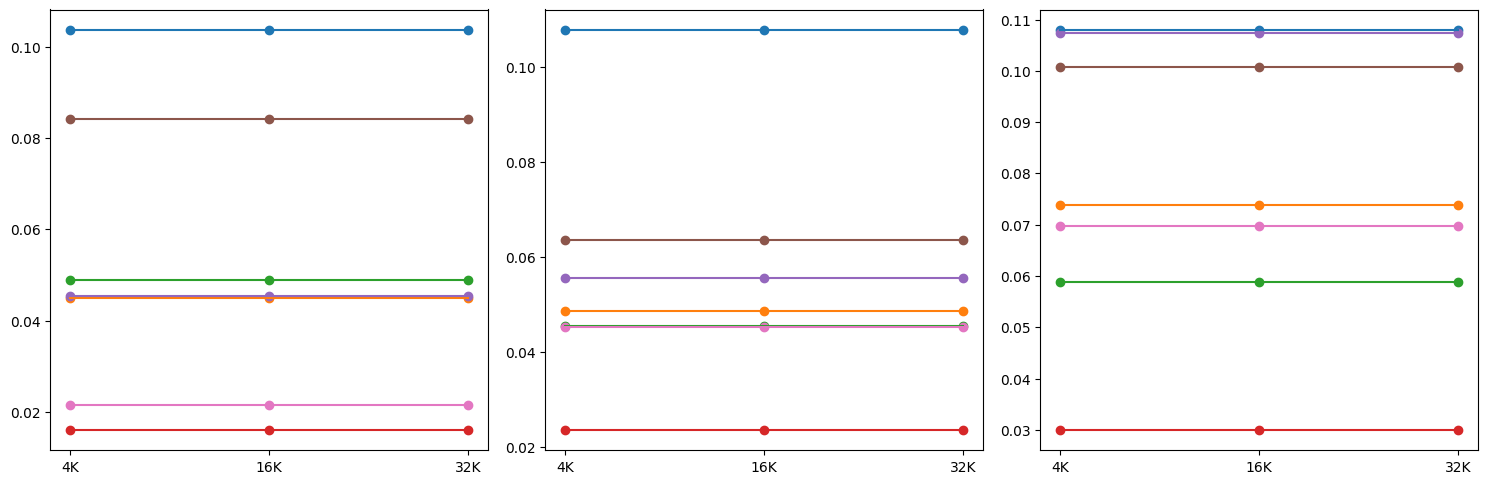

In [31]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

fig.tight_layout()
for needle_position_index in range(len(needle_positions)):
    needle_position = needle_positions[needle_position_index]
    for lang in languages:
        plot_data = []
        for context_length in context_lengths:
            plot_data.append(np.mean(context_length_info[lang][context_length][needle_position]))
        ax[needle_position_index].scatter(context_lengths, plot_data, label = lang)
        ax[needle_position_index].plot(context_lengths, plot_data, label = lang)

## accuracy_semantic_similarity

In [32]:
metric = 'accuracy_semantic_similarity'
path_to_data = '/home/prasoon/Desktop/analysis/data'
response_model = 'llama-2-7b-chat'

In [34]:
import os
import glob
import json
import ast

path = path_to_data + '/' + response_model
os.chdir(path)
extension = 'csv'
files = glob.glob('*.{}'.format(extension))


context_length_info = {}
languages = ['en', 'hi', 'de', 'zh', 'vi', 'es', 'ar']
context_lengths = ['4K', '16K', '32K']
needle_positions = ['start', 'middle', 'end']

for language in languages:
    context_length_info[language] = {}
    for context_length in context_lengths:
        context_length_info[language][context_length] = {}
        for needle_position in needle_positions:
            context_length_info[language][context_length][needle_position] = []

count = 0
for file in files:
    print(file)
    context_length = file.split('_')[-1].split('.')[0]
    df = pd.read_csv(path_to_data + '/' + response_model + '/' + file)
    for index, row in tqdm(df.iterrows()):
        experiment_info = ast.literal_eval(df.loc[index]['experiment'])
        if(check_monolingual(experiment_info)):
            lang = check_monolingual(experiment_info)
            needle_position = experiment_info['needle_position']
            context_length_info[lang][context_length][needle_position].append(row[metric])

llama-2-7b-chat_4K.csv


117600it [00:13, 8577.66it/s]


llama-2-7b-chat_32K.csv


117600it [00:13, 8827.47it/s]


llama-2-7b-chat_16K.csv


117600it [00:13, 8743.27it/s]


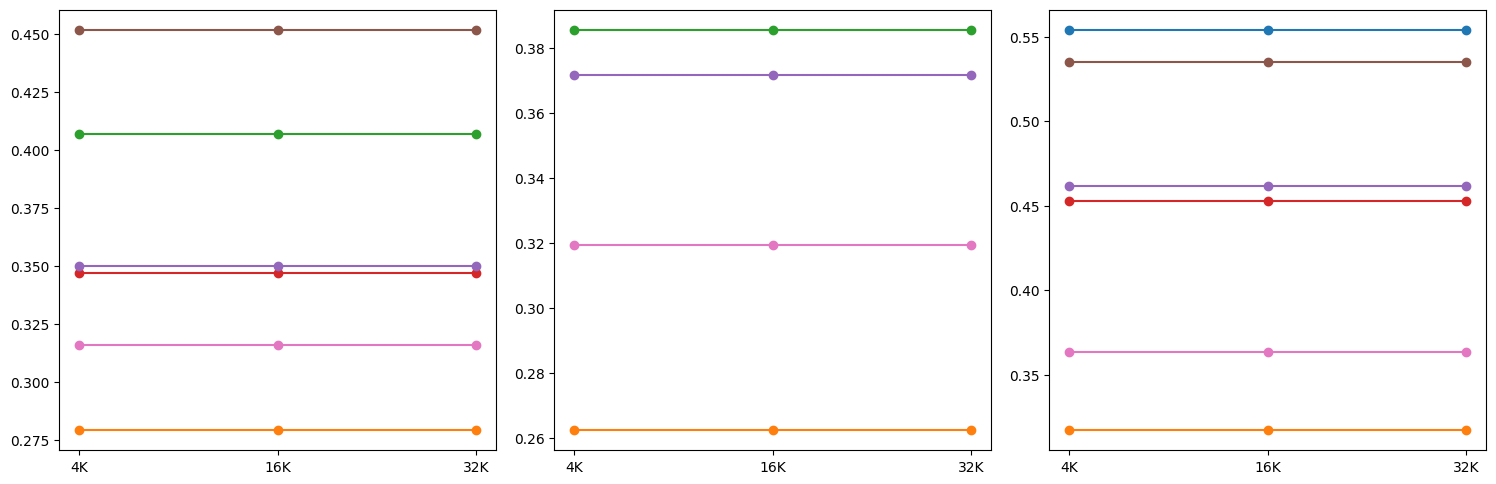

In [36]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

fig.tight_layout()
for needle_position_index in range(len(needle_positions)):
    needle_position = needle_positions[needle_position_index]
    for lang in languages:
        plot_data = []
        for context_length in context_lengths:
            plot_data.append(np.mean(context_length_info[lang][context_length][needle_position]))
        ax[needle_position_index].scatter(context_lengths, plot_data, label = lang)
        ax[needle_position_index].plot(context_lengths, plot_data, label = lang)

## accuracy_ss_threshold

In [105]:
metric = 'accuracy_ss_threshold'
path_to_data = '/home/prasoon/Desktop/analysis/data'
response_model = 'llama-2-7b-chat'

In [106]:
import os
import glob
import json
import ast

path = path_to_data + '/' + response_model
os.chdir(path)
extension = 'csv'
files = glob.glob('*.{}'.format(extension))


context_length_info = {}
languages = ['en', 'hi', 'de', 'zh', 'vi', 'es', 'ar']
context_lengths = ['4K', '16K', '32K']
needle_positions = ['start', 'middle', 'end']

for language in languages:
    context_length_info[language] = {}
    for context_length in context_lengths:
        context_length_info[language][context_length] = {}
        for needle_position in needle_positions:
            context_length_info[language][context_length][needle_position] = []

count = 0
for file in files:
    print(file)
    context_length = file.split('_')[-1].split('.')[0]
    df = pd.read_csv(path_to_data + '/' + response_model + '/' + file)
    for index, row in tqdm(df.iterrows()):
        experiment_info = ast.literal_eval(df.loc[index]['experiment'])
        if(check_monolingual(experiment_info)):
            lang = check_monolingual(experiment_info)
            needle_position = experiment_info['needle_position']
            context_length_info[lang][context_length][needle_position].append(row[metric])

llama-2-7b-chat_4K.csv


117600it [00:17, 6746.07it/s]


llama-2-7b-chat_32K.csv


117600it [00:14, 7911.72it/s]


llama-2-7b-chat_16K.csv


117600it [00:13, 8605.83it/s]


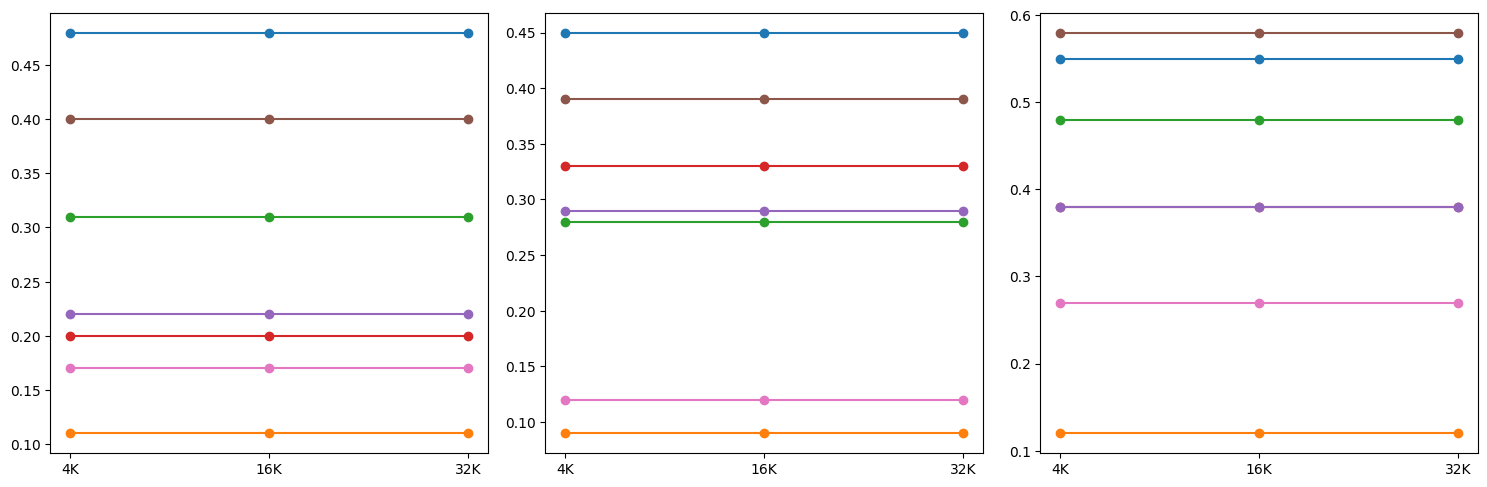

In [107]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

fig.tight_layout()
for needle_position_index in range(len(needle_positions)):
    needle_position = needle_positions[needle_position_index]
    for lang in languages:
        plot_data = []
        for context_length in context_lengths:
            plot_data.append(np.mean(context_length_info[lang][context_length][needle_position]))
        ax[needle_position_index].scatter(context_lengths, plot_data, label = lang)
        ax[needle_position_index].plot(context_lengths, plot_data, label = lang)

# question_lang

## accuracy_binary

In [37]:
metric = 'accuracy_binary'
path_to_data = '/home/prasoon/Desktop/analysis/data'
response_model = 'llama-2-7b-chat'

In [39]:
context_length_info = {}
for context_length in context_lengths:
    context_length_info[context_length] = None
    
path = path_to_data + '/' + response_model
os.chdir(path)
extension = 'csv'
files = glob.glob('*.{}'.format(extension))

print(files)

for file in files:
    # for one context-length version of the model
    context_length = file.split('_')[-1].split('.')[0]
    df = pd.read_csv(path_to_data + '/' + response_model + '/' + file)

    matrix = {}
    for lang_a in languages:
        matrix[lang_a] = {}
        for lang_b in languages:
            matrix[lang_a][lang_b] = []

    
    for index, row in tqdm(df.iterrows()):
        context_lang = df.loc[index]['context_lang']
        question_lang = df.loc[index]['question_lang']
        noise_type = df.loc[index]['noise_type']
        if(context_lang == noise_type):
            matrix[context_lang][question_lang].append(df.loc[index][metric])
            
    context_length_info[context_length] = matrix

['llama-2-7b-chat_4K.csv', 'llama-2-7b-chat_32K.csv', 'llama-2-7b-chat_16K.csv']


117600it [00:26, 4511.73it/s]
117600it [00:26, 4399.28it/s]
117600it [00:26, 4482.82it/s]


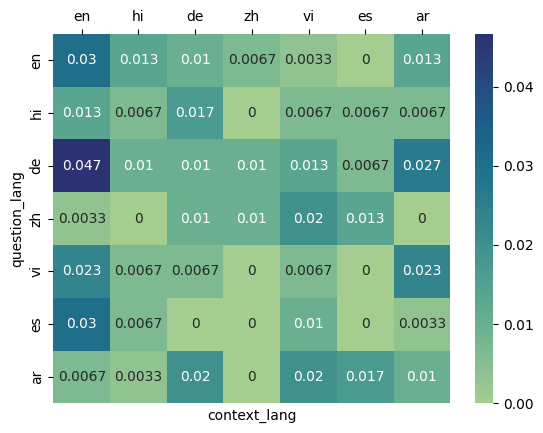

In [40]:
plot_data = {}
context_lengths_to_plot = ['4K', '16K', '32K'] # ---> change to show context length wise
for context_lang in languages:
    plot_data[context_lang] = {}
    for question_lang in languages:
        plot_data[context_lang][question_lang] = None
for context_lang in languages:
    for question_lang in languages:
        full_row_context_agnostic = []
        for context_length in context_lengths:
            if(context_length in context_lengths_to_plot):
                full_row_context_agnostic.extend(context_length_info[context_length][context_lang][question_lang])
        plot_data[context_lang][question_lang] = np.mean(full_row_context_agnostic) 
ax = sns.heatmap(pd.DataFrame(plot_data), annot=True, cmap = 'crest')
ax.set(xlabel="context_lang", ylabel="question_lang")
ax.xaxis.tick_top()

## accuracy_prob

In [43]:
metric = 'accuracy_prob'
path_to_data = '/home/prasoon/Desktop/analysis/data'
response_model = 'llama-2-7b-chat'

In [44]:
context_length_info = {}
for context_length in context_lengths:
    context_length_info[context_length] = None
    
path = path_to_data + '/' + response_model
extension = 'csv'
files = glob.glob('*.{}'.format(extension))

print(files)

for file in files:
    # for one context-length version of the model
    context_length = file.split('_')[-1].split('.')[0]
    df = pd.read_csv(path_to_data + '/' + response_model + '/' + file)

    matrix = {}
    for lang_a in languages:
        matrix[lang_a] = {}
        for lang_b in languages:
            matrix[lang_a][lang_b] = []

    
    for index, row in tqdm(df.iterrows()):
        context_lang = df.loc[index]['context_lang']
        question_lang = df.loc[index]['question_lang']
        noise_type = df.loc[index]['noise_type']
        if(context_lang == noise_type):
            matrix[context_lang][question_lang].append(df.loc[index][metric])
            
    context_length_info[context_length] = matrix

['llama-2-7b-chat_4K.csv', 'llama-2-7b-chat_32K.csv', 'llama-2-7b-chat_16K.csv']


117600it [00:26, 4486.27it/s]
117600it [00:26, 4507.69it/s]
117600it [00:25, 4540.68it/s]


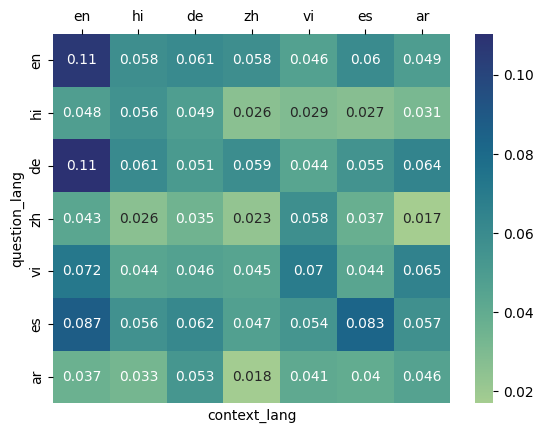

In [45]:
plot_data = {}
context_lengths_to_plot = ['4K', '16K', '32K'] # ---> change to show context length wise
for context_lang in languages:
    plot_data[context_lang] = {}
    for question_lang in languages:
        plot_data[context_lang][question_lang] = None
for context_lang in languages:
    for question_lang in languages:
        full_row_context_agnostic = []
        for context_length in context_lengths:
            if(context_length in context_lengths_to_plot):
                full_row_context_agnostic.extend(context_length_info[context_length][context_lang][question_lang])
        plot_data[context_lang][question_lang] = np.mean(full_row_context_agnostic) 
ax = sns.heatmap(pd.DataFrame(plot_data), annot=True, cmap = 'crest')
ax.set(xlabel="context_lang", ylabel="question_lang")
ax.xaxis.tick_top()

## accuracy_semantic_similarity

In [46]:
metric = 'accuracy_semantic_similarity'
path_to_data = '/home/prasoon/Desktop/analysis/data'
response_model = 'llama-2-7b-chat'

In [47]:

context_length_info = {}
for context_length in context_lengths:
    context_length_info[context_length] = None
    
path = path_to_data + '/' + response_model
extension = 'csv'
files = glob.glob('*.{}'.format(extension))

print(files)

for file in files:
    # for one context-length version of the model
    context_length = file.split('_')[-1].split('.')[0]
    df = pd.read_csv(path_to_data + '/' + response_model + '/' + file)

    matrix = {}
    for lang_a in languages:
        matrix[lang_a] = {}
        for lang_b in languages:
            matrix[lang_a][lang_b] = []

    
    for index, row in tqdm(df.iterrows()):
        context_lang = df.loc[index]['context_lang']
        question_lang = df.loc[index]['question_lang']
        noise_type = df.loc[index]['noise_type']
        if(context_lang == noise_type):
            matrix[context_lang][question_lang].append(df.loc[index][metric])
            
    context_length_info[context_length] = matrix

['llama-2-7b-chat_4K.csv', 'llama-2-7b-chat_32K.csv', 'llama-2-7b-chat_16K.csv']


117600it [00:25, 4579.54it/s]
117600it [00:25, 4642.62it/s]
117600it [00:25, 4557.42it/s]


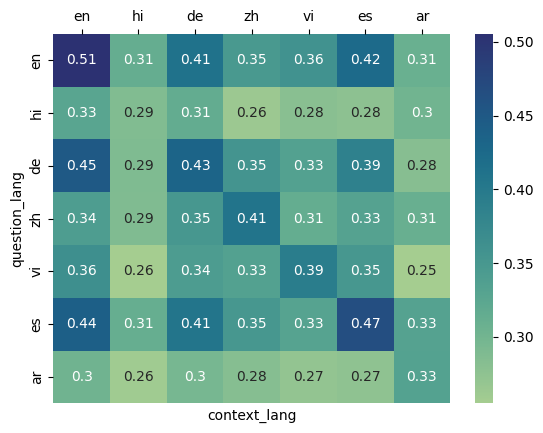

In [49]:
plot_data = {}
context_lengths_to_plot = ['4K', '16K', '32K'] # ---> change to show context length wise
for context_lang in languages:
    plot_data[context_lang] = {}
    for question_lang in languages:
        plot_data[context_lang][question_lang] = None
for context_lang in languages:
    for question_lang in languages:
        full_row_context_agnostic = []
        for context_length in context_lengths:
            if(context_length in context_lengths_to_plot):
                full_row_context_agnostic.extend(context_length_info[context_length][context_lang][question_lang])
        plot_data[context_lang][question_lang] = np.nanmean(full_row_context_agnostic) 
ax = sns.heatmap(pd.DataFrame(plot_data), annot=True, cmap = 'crest')
ax.set(xlabel="context_lang", ylabel="question_lang")
ax.xaxis.tick_top()

## accuracy_ss_threshold

In [108]:
metric = 'accuracy_ss_threshold'
path_to_data = '/home/prasoon/Desktop/analysis/data'
response_model = 'llama-2-7b-chat'

In [109]:
context_length_info = {}
for context_length in context_lengths:
    context_length_info[context_length] = None
    
path = path_to_data + '/' + response_model
extension = 'csv'
files = glob.glob('*.{}'.format(extension))

print(files)

for file in files:
    # for one context-length version of the model
    context_length = file.split('_')[-1].split('.')[0]
    df = pd.read_csv(path_to_data + '/' + response_model + '/' + file)

    matrix = {}
    for lang_a in languages:
        matrix[lang_a] = {}
        for lang_b in languages:
            matrix[lang_a][lang_b] = []

    
    for index, row in tqdm(df.iterrows()):
        context_lang = df.loc[index]['context_lang']
        question_lang = df.loc[index]['question_lang']
        noise_type = df.loc[index]['noise_type']
        if(context_lang == noise_type):
            matrix[context_lang][question_lang].append(df.loc[index][metric])
            
    context_length_info[context_length] = matrix

['llama-2-7b-chat_4K.csv', 'llama-2-7b-chat_32K.csv', 'llama-2-7b-chat_16K.csv']


117600it [00:26, 4440.05it/s]
117600it [00:26, 4402.04it/s]
117600it [00:26, 4453.46it/s]


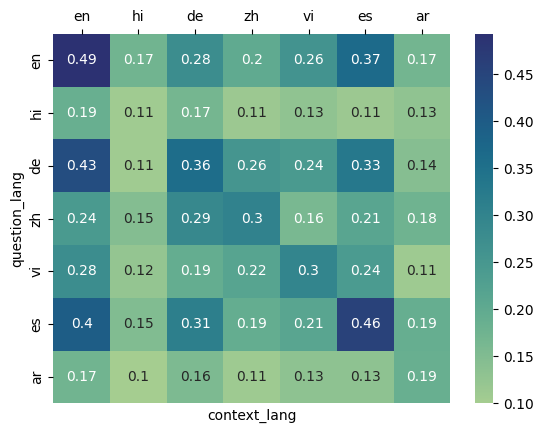

In [110]:
plot_data = {}
context_lengths_to_plot = ['4K', '16K', '32K'] # ---> change to show context length wise
for context_lang in languages:
    plot_data[context_lang] = {}
    for question_lang in languages:
        plot_data[context_lang][question_lang] = None
for context_lang in languages:
    for question_lang in languages:
        full_row_context_agnostic = []
        for context_length in context_lengths:
            if(context_length in context_lengths_to_plot):
                full_row_context_agnostic.extend(context_length_info[context_length][context_lang][question_lang])
        plot_data[context_lang][question_lang] = np.nanmean(full_row_context_agnostic) 
ax = sns.heatmap(pd.DataFrame(plot_data), annot=True, cmap = 'crest')
ax.set(xlabel="context_lang", ylabel="question_lang")
ax.xaxis.tick_top()

# context_lang

## accuracy_binary

In [53]:
metric = 'accuracy_binary'
path_to_data = '/home/prasoon/Desktop/analysis/data'
response_model = 'llama-2-7b-chat'

In [54]:
context_length_info = {}
for context_length in context_lengths:
    context_length_info[context_length] = None
    
path = path_to_data + '/' + response_model
extension = 'csv'
files = glob.glob('*.{}'.format(extension))

print(files)

for file in files:
    # for one context-length version of the model
    context_length = file.split('_')[-1].split('.')[0]
    df = pd.read_csv(path_to_data + '/' + response_model + '/' + file)

    matrix = {}
    for lang_a in languages:
        matrix[lang_a] = {}
        for lang_b in languages:
            matrix[lang_a][lang_b] = []

    
    for index, row in tqdm(df.iterrows()):
        context_lang = df.loc[index]['context_lang']
        question_lang = df.loc[index]['question_lang']
        noise_type = df.loc[index]['noise_type']
        if(question_lang == noise_type):
            matrix[context_lang][question_lang].append(df.loc[index][metric])
            
    context_length_info[context_length] = matrix

['llama-2-7b-chat_4K.csv', 'llama-2-7b-chat_32K.csv', 'llama-2-7b-chat_16K.csv']


117600it [00:26, 4471.74it/s]
117600it [00:25, 4533.84it/s]
117600it [00:26, 4434.84it/s]


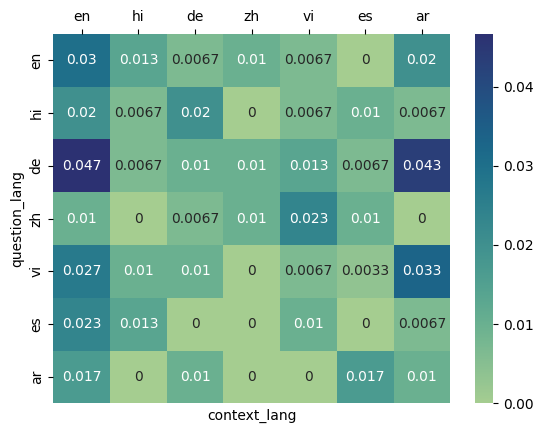

In [55]:
plot_data = {}
context_lengths_to_plot = ['4K', '16K', '32K'] # ---> change to show context length wise
for context_lang in languages:
    plot_data[context_lang] = {}
    for question_lang in languages:
        plot_data[context_lang][question_lang] = None
for context_lang in languages:
    for question_lang in languages:
        full_row_context_agnostic = []
        for context_length in context_lengths:
            if(context_length in context_lengths_to_plot):
                full_row_context_agnostic.extend(context_length_info[context_length][context_lang][question_lang])
        plot_data[context_lang][question_lang] = np.nanmean(full_row_context_agnostic) 
ax = sns.heatmap(pd.DataFrame(plot_data), annot=True, cmap = 'crest')
ax.set(xlabel="context_lang", ylabel="question_lang")
ax.xaxis.tick_top()

## accuracy_prob

In [57]:
metric = 'accuracy_prob'
path_to_data = '/home/prasoon/Desktop/analysis/data'
response_model = 'llama-2-7b-chat'

In [58]:
context_length_info = {}
for context_length in context_lengths:
    context_length_info[context_length] = None
    
path = path_to_data + '/' + response_model
extension = 'csv'
files = glob.glob('*.{}'.format(extension))

print(files)

for file in files:
    # for one context-length version of the model
    context_length = file.split('_')[-1].split('.')[0]
    df = pd.read_csv(path_to_data + '/' + response_model + '/' + file)

    matrix = {}
    for lang_a in languages:
        matrix[lang_a] = {}
        for lang_b in languages:
            matrix[lang_a][lang_b] = []

    
    for index, row in tqdm(df.iterrows()):
        context_lang = df.loc[index]['context_lang']
        question_lang = df.loc[index]['question_lang']
        noise_type = df.loc[index]['noise_type']
        if(question_lang == noise_type):
            matrix[context_lang][question_lang].append(df.loc[index][metric])
            
    context_length_info[context_length] = matrix

['llama-2-7b-chat_4K.csv', 'llama-2-7b-chat_32K.csv', 'llama-2-7b-chat_16K.csv']


117600it [00:25, 4557.57it/s]
117600it [00:26, 4492.54it/s]
117600it [00:26, 4501.69it/s]


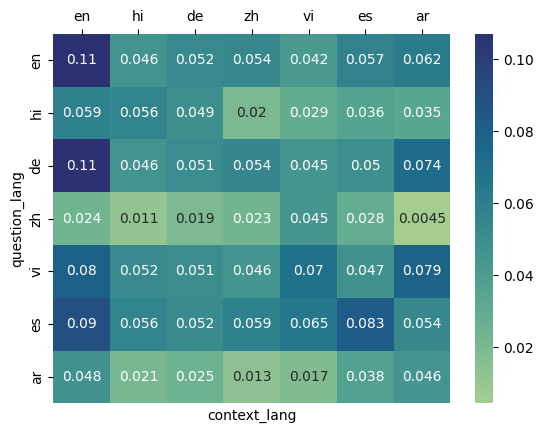

In [59]:
plot_data = {}
context_lengths_to_plot = ['4K', '16K', '32K'] # ---> change to show context length wise
for context_lang in languages:
    plot_data[context_lang] = {}
    for question_lang in languages:
        plot_data[context_lang][question_lang] = None
for context_lang in languages:
    for question_lang in languages:
        full_row_context_agnostic = []
        for context_length in context_lengths:
            if(context_length in context_lengths_to_plot):
                full_row_context_agnostic.extend(context_length_info[context_length][context_lang][question_lang])
        plot_data[context_lang][question_lang] = np.nanmean(full_row_context_agnostic) 
ax = sns.heatmap(pd.DataFrame(plot_data), annot=True, cmap = 'crest')
ax.set(xlabel="context_lang", ylabel="question_lang")
ax.xaxis.tick_top()

## accuracy_semantic_similarity

In [50]:
metric = 'accuracy_semantic_similarity'
path_to_data = '/home/prasoon/Desktop/analysis/data'
response_model = 'llama-2-7b-chat'

In [51]:
context_length_info = {}
for context_length in context_lengths:
    context_length_info[context_length] = None
    
path = path_to_data + '/' + response_model
extension = 'csv'
files = glob.glob('*.{}'.format(extension))

print(files)

for file in files:
    # for one context-length version of the model
    context_length = file.split('_')[-1].split('.')[0]
    df = pd.read_csv(path_to_data + '/' + response_model + '/' + file)

    matrix = {}
    for lang_a in languages:
        matrix[lang_a] = {}
        for lang_b in languages:
            matrix[lang_a][lang_b] = []

    
    for index, row in tqdm(df.iterrows()):
        context_lang = df.loc[index]['context_lang']
        question_lang = df.loc[index]['question_lang']
        noise_type = df.loc[index]['noise_type']
        if(question_lang == noise_type):
            matrix[context_lang][question_lang].append(df.loc[index][metric])
    context_length_info[context_length] = matrix

['llama-2-7b-chat_4K.csv', 'llama-2-7b-chat_32K.csv', 'llama-2-7b-chat_16K.csv']


117600it [00:25, 4574.45it/s]
117600it [00:25, 4568.24it/s]
117600it [00:26, 4519.00it/s]


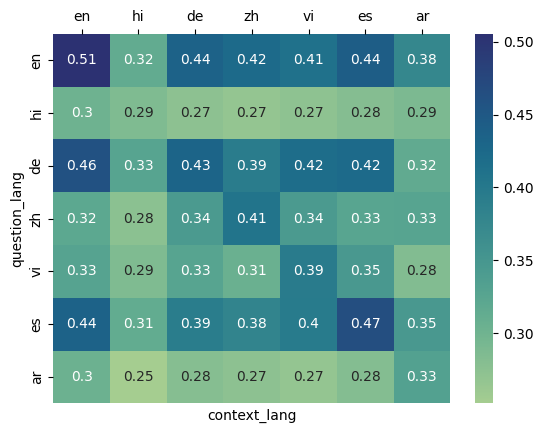

In [52]:
plot_data = {}
context_lengths_to_plot = ['4K', '16K', '32K'] # ---> change to show context length wise
for context_lang in languages:
    plot_data[context_lang] = {}
    for question_lang in languages:
        plot_data[context_lang][question_lang] = None
for context_lang in languages:
    for question_lang in languages:
        full_row_context_agnostic = []
        for context_length in context_lengths:
            if(context_length in context_lengths_to_plot):
                full_row_context_agnostic.extend(context_length_info[context_length][context_lang][question_lang])
        plot_data[context_lang][question_lang] = np.nanmean(full_row_context_agnostic) 
ax = sns.heatmap(pd.DataFrame(plot_data), annot=True, cmap = 'crest')
ax.set(xlabel="context_lang", ylabel="question_lang")
ax.xaxis.tick_top()

## accuracy_ss_threshold

In [111]:
metric = 'accuracy_ss_threshold'
path_to_data = '/home/prasoon/Desktop/analysis/data'
response_model = 'llama-2-7b-chat'

In [112]:
context_length_info = {}
for context_length in context_lengths:
    context_length_info[context_length] = None
    
path = path_to_data + '/' + response_model
extension = 'csv'
files = glob.glob('*.{}'.format(extension))

print(files)

for file in files:
    # for one context-length version of the model
    context_length = file.split('_')[-1].split('.')[0]
    df = pd.read_csv(path_to_data + '/' + response_model + '/' + file)

    matrix = {}
    for lang_a in languages:
        matrix[lang_a] = {}
        for lang_b in languages:
            matrix[lang_a][lang_b] = []

    
    for index, row in tqdm(df.iterrows()):
        context_lang = df.loc[index]['context_lang']
        question_lang = df.loc[index]['question_lang']
        noise_type = df.loc[index]['noise_type']
        if(question_lang == noise_type):
            matrix[context_lang][question_lang].append(df.loc[index][metric])
    context_length_info[context_length] = matrix

['llama-2-7b-chat_4K.csv', 'llama-2-7b-chat_32K.csv', 'llama-2-7b-chat_16K.csv']


117600it [00:26, 4448.83it/s]
117600it [00:27, 4339.30it/s]
117600it [00:26, 4433.01it/s]


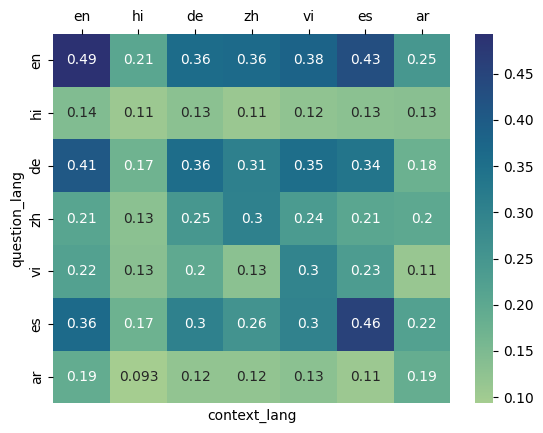

In [113]:
plot_data = {}
context_lengths_to_plot = ['4K', '16K', '32K'] # ---> change to show context length wise
for context_lang in languages:
    plot_data[context_lang] = {}
    for question_lang in languages:
        plot_data[context_lang][question_lang] = None
for context_lang in languages:
    for question_lang in languages:
        full_row_context_agnostic = []
        for context_length in context_lengths:
            if(context_length in context_lengths_to_plot):
                full_row_context_agnostic.extend(context_length_info[context_length][context_lang][question_lang])
        plot_data[context_lang][question_lang] = np.nanmean(full_row_context_agnostic) 
ax = sns.heatmap(pd.DataFrame(plot_data), annot=True, cmap = 'crest')
ax.set(xlabel="context_lang", ylabel="question_lang")
ax.xaxis.tick_top()

# needle_position

## accuracy_binary

In [61]:
metric = 'accuracy_binary'
path_to_data = '/home/prasoon/Desktop/analysis/data'
response_model = 'llama-2-7b-chat'

In [67]:
context_length_info = {}
for context_length in context_lengths:
    context_length_info[context_length] = {}
    for needle_position in needle_positions:
        context_length_info[context_length][needle_position] = []
    
path = path_to_data + '/' + response_model
os.chdir(path)
extension = 'csv'
files = glob.glob('*.{}'.format(extension))

print(files)

for file in files:
    # for one context-length version of the model
    context_length = file.split('_')[-1].split('.')[0]
    df = pd.read_csv(path_to_data + '/' + response_model + '/' + file)
    for index, row in tqdm(df.iterrows()):
        
        context_lang = df.loc[index]['context_lang']
        question_lang = df.loc[index]['question_lang']
        noise_type = df.loc[index]['noise_type']
        needle_position = ast.literal_eval(df.loc[index]['experiment'])['needle_position']
        
        context_length_info[context_length][needle_position].append(df.loc[index][metric])

['llama-2-7b-chat_4K.csv', 'llama-2-7b-chat_32K.csv', 'llama-2-7b-chat_16K.csv']


117600it [00:42, 2740.46it/s]
117600it [00:42, 2766.92it/s]
117600it [00:43, 2733.77it/s]


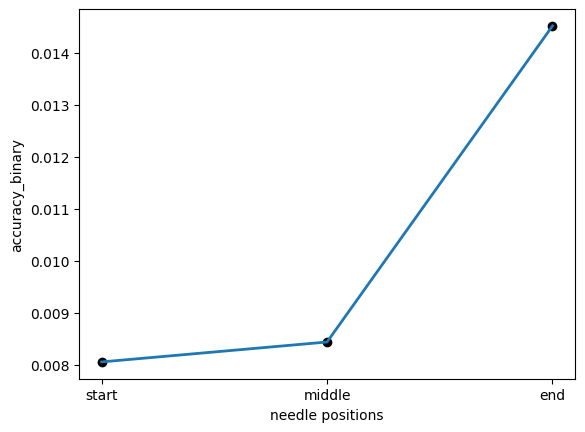

In [97]:
context_lengths_to_plot = ['4K', '16K', '32K']
plot_data = []
for needle_position_index in range(len(needle_positions)):
    needle_position = needle_positions[needle_position_index]
    needle_wise_array = []
    for context_length in context_lengths_to_plot:
        needle_wise_array.append(context_length_info[context_length][needle_position])
    plot_data.append(np.nanmean(needle_wise_array))

plt.xlabel('needle positions')
plt.ylabel(metric)
plt.scatter(needle_positions, plot_data, color='black', marker = 'o')
plt.plot(needle_positions, plot_data, linewidth = 2)
plt.show()

## accuracy_prob

In [98]:
metric = 'accuracy_prob'
path_to_data = '/home/prasoon/Desktop/analysis/data'
response_model = 'llama-2-7b-chat'

In [99]:
context_length_info = {}
for context_length in context_lengths:
    context_length_info[context_length] = {}
    for needle_position in needle_positions:
        context_length_info[context_length][needle_position] = []
    
path = path_to_data + '/' + response_model
os.chdir(path)
extension = 'csv'
files = glob.glob('*.{}'.format(extension))

print(files)

for file in files:
    # for one context-length version of the model
    context_length = file.split('_')[-1].split('.')[0]
    df = pd.read_csv(path_to_data + '/' + response_model + '/' + file)
    for index, row in tqdm(df.iterrows()):
        
        context_lang = df.loc[index]['context_lang']
        question_lang = df.loc[index]['question_lang']
        noise_type = df.loc[index]['noise_type']
        needle_position = ast.literal_eval(df.loc[index]['experiment'])['needle_position']
        
        context_length_info[context_length][needle_position].append(df.loc[index][metric])

['llama-2-7b-chat_4K.csv', 'llama-2-7b-chat_32K.csv', 'llama-2-7b-chat_16K.csv']


117600it [00:43, 2715.35it/s]
117600it [00:42, 2745.99it/s]
117600it [00:42, 2743.41it/s]


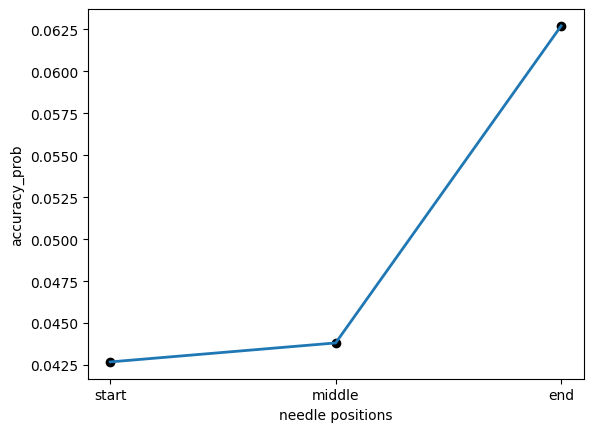

In [100]:
context_lengths_to_plot = ['4K', '16K', '32K']
plot_data = []
for needle_position_index in range(len(needle_positions)):
    needle_position = needle_positions[needle_position_index]
    needle_wise_array = []
    for context_length in context_lengths_to_plot:
        needle_wise_array.append(context_length_info[context_length][needle_position])
    plot_data.append(np.nanmean(needle_wise_array))

plt.xlabel('needle positions')
plt.ylabel(metric)
plt.scatter(needle_positions, plot_data, color='black', marker = 'o')
plt.plot(needle_positions, plot_data, linewidth = 2)
plt.show()

## accuracy_semantic_similarity

In [101]:
metric = 'accuracy_semantic_similarity'
path_to_data = '/home/prasoon/Desktop/analysis/data'
response_model = 'llama-2-7b-chat'

In [102]:
context_length_info = {}
for context_length in context_lengths:
    context_length_info[context_length] = {}
    for needle_position in needle_positions:
        context_length_info[context_length][needle_position] = []
    
path = path_to_data + '/' + response_model
os.chdir(path)
extension = 'csv'
files = glob.glob('*.{}'.format(extension))

print(files)

for file in files:
    # for one context-length version of the model
    context_length = file.split('_')[-1].split('.')[0]
    df = pd.read_csv(path_to_data + '/' + response_model + '/' + file)
    for index, row in tqdm(df.iterrows()):
        
        context_lang = df.loc[index]['context_lang']
        question_lang = df.loc[index]['question_lang']
        noise_type = df.loc[index]['noise_type']
        needle_position = ast.literal_eval(df.loc[index]['experiment'])['needle_position']
        
        context_length_info[context_length][needle_position].append(df.loc[index][metric])

['llama-2-7b-chat_4K.csv', 'llama-2-7b-chat_32K.csv', 'llama-2-7b-chat_16K.csv']


117600it [00:43, 2730.88it/s]
117600it [00:42, 2738.08it/s]
117600it [00:42, 2753.66it/s]


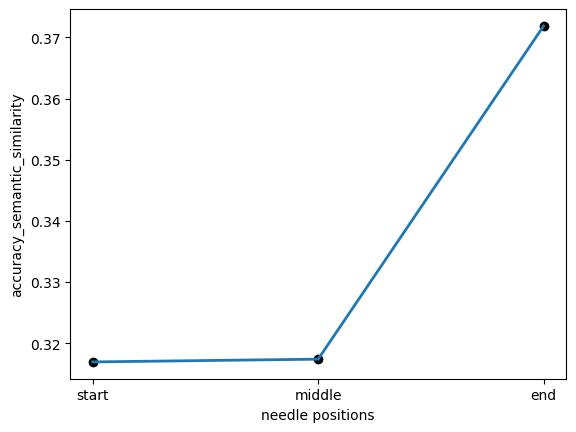

In [103]:
context_lengths_to_plot = ['4K', '16K', '32K']
plot_data = []
for needle_position_index in range(len(needle_positions)):
    needle_position = needle_positions[needle_position_index]
    needle_wise_array = []
    for context_length in context_lengths_to_plot:
        needle_wise_array.append(context_length_info[context_length][needle_position])
    plot_data.append(np.nanmean(needle_wise_array))

plt.xlabel('needle positions')
plt.ylabel(metric)
plt.scatter(needle_positions, plot_data, color='black', marker = 'o')
plt.plot(needle_positions, plot_data, linewidth = 2)
plt.show()

## accuracy_ss_threshold

In [114]:
metric = 'accuracy_ss_threshold'
path_to_data = '/home/prasoon/Desktop/analysis/data'
response_model = 'llama-2-7b-chat'

In [115]:
context_length_info = {}
for context_length in context_lengths:
    context_length_info[context_length] = {}
    for needle_position in needle_positions:
        context_length_info[context_length][needle_position] = []
    
path = path_to_data + '/' + response_model
os.chdir(path)
extension = 'csv'
files = glob.glob('*.{}'.format(extension))

print(files)

for file in files:
    # for one context-length version of the model
    context_length = file.split('_')[-1].split('.')[0]
    df = pd.read_csv(path_to_data + '/' + response_model + '/' + file)
    for index, row in tqdm(df.iterrows()):
        
        context_lang = df.loc[index]['context_lang']
        question_lang = df.loc[index]['question_lang']
        noise_type = df.loc[index]['noise_type']
        needle_position = ast.literal_eval(df.loc[index]['experiment'])['needle_position']
        
        context_length_info[context_length][needle_position].append(df.loc[index][metric])

['llama-2-7b-chat_4K.csv', 'llama-2-7b-chat_32K.csv', 'llama-2-7b-chat_16K.csv']


117600it [00:43, 2704.06it/s]
117600it [00:43, 2706.27it/s]
117600it [00:43, 2701.95it/s]


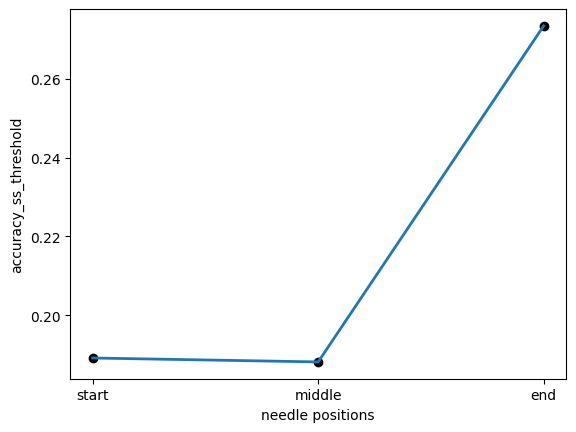

In [116]:
context_lengths_to_plot = ['4K', '16K', '32K']
plot_data = []
for needle_position_index in range(len(needle_positions)):
    needle_position = needle_positions[needle_position_index]
    needle_wise_array = []
    for context_length in context_lengths_to_plot:
        needle_wise_array.append(context_length_info[context_length][needle_position])
    plot_data.append(np.nanmean(needle_wise_array))

plt.xlabel('needle positions')
plt.ylabel(metric)
plt.scatter(needle_positions, plot_data, color='black', marker = 'o')
plt.plot(needle_positions, plot_data, linewidth = 2)
plt.show()